<a href="https://colab.research.google.com/github/Hkhero79/Hk-online-Retail-customer-segmentation/blob/main/Hk_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [47]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
 data = pd.read_excel('/content/drive/MyDrive/Data & Resources/Online Retail.xlsx')

In [50]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [51]:
data.shape

(541909, 8)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [53]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [54]:
# Total null values in each of the columns
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [55]:
# Dropping the null values of the description column
data.dropna(subset = ['Description'], inplace = True)
data.dropna(subset=['CustomerID'], axis = 0, inplace = True)

In [56]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [57]:
df_online=data.copy()

In [58]:
df_online.shape

(406829, 8)

In [59]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [60]:
# Converting the column to a string type to detect 'C'
df_online['InvoiceNo'] = df_online['InvoiceNo'].apply(str)

In [61]:
# Creating a function to detect cancelled orders
def cancelled_order(rows):
  '''Detects cancelled orders and returns YES or NO accordingly'''
  if 'C' in rows:
    return 'YES'
  else:
    return 'NO'

In [62]:
# Applying the above function and creating a new column to display cancelled orders
df_online['Cancelled'] = df_online['InvoiceNo'].apply(cancelled_order)

In [63]:
# Dropping the cancelled orders
df_online.drop(df_online[df_online['Cancelled'] == 'YES'].index, inplace=True)

In [64]:
# Dropping the cancelled column
df_online.drop('Cancelled', axis = 1, inplace = True)

In [65]:
# Converting the Invoice no column back to a numerical type
df_online['InvoiceNo'] = df_online['InvoiceNo'].apply(int)

In [66]:
# Dropping Stock Code column
df_online.drop('StockCode', axis = 1, inplace = True)

In [67]:
# Using the Invoice date column to extract 
df_online['Day'] = df_online['InvoiceDate'].dt.day
df_online['Month'] = df_online['InvoiceDate'].dt.month
df_online['Year'] = df_online['InvoiceDate'].dt.year

In [68]:
# Dropping the invoice date column
df_online.drop('InvoiceDate', axis = 1, inplace = True)

In [69]:
df_online.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Day,Month,Year
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171,15.042181,7.612537,2010.934259
std,13106.167695,180.420210,22.096788,1713.169877,8.653771,3.416527,0.247829
min,536365.000000,1.000000,0.000000,12346.000000,1.000000,1.000000,2010.000000
25%,549234.000000,2.000000,1.250000,13969.000000,7.000000,5.000000,2011.000000
50%,561893.000000,6.000000,1.950000,15159.000000,15.000000,8.000000,2011.000000
75%,572090.000000,12.000000,3.750000,16795.000000,22.000000,11.000000,2011.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,31.000000,12.000000,2011.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


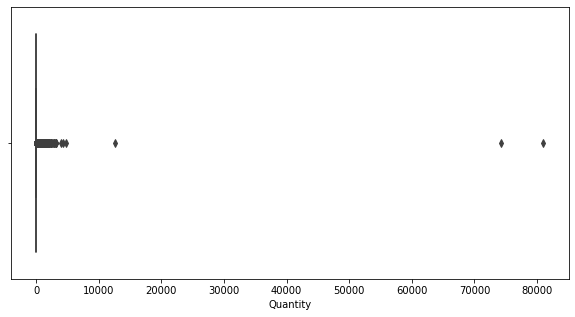

In [70]:
# Distribution of the Quantity column
plt.figure(figsize=(10,5))
sns.boxplot(df_online['Quantity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


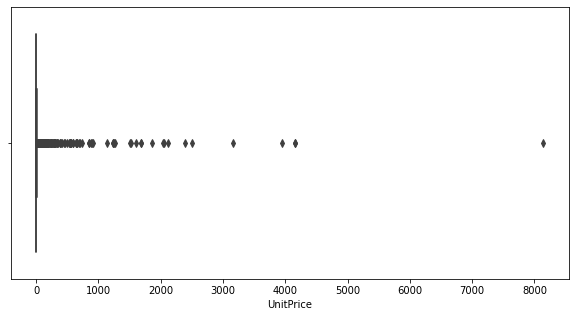

In [71]:
 #Distribution of the Quantity column
plt.figure(figsize=(10,5))
sns.boxplot(df_online['UnitPrice'])
plt.show()

In [72]:
# Creating a function to remove outliers
def remove_outliers(df , column):
  '''Removes outliers in given the dataframe and column'''
  q3 = df[column].quantile(0.75)
  q1 = df[column].quantile(0.25)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)

  if lower_limit < 0:
    df = df[df[column] <= upper_limit]
  else:
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]   
  
  return df

In [73]:
# Removing the outliers using the function created
df_online = remove_outliers(df = df_online, column = 'Quantity')
df_online = remove_outliers(df = df_online, column = 'UnitPrice')

**EDA**

In [74]:
# Top 10 most repeatedly sold items
df_online['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    1680
JUMBO BAG RED RETROSPOT               1329
PARTY BUNTING                         1275
LUNCH BAG RED RETROSPOT               1207
ASSORTED COLOUR BIRD ORNAMENT         1159
SET OF 3 CAKE TINS PANTRY DESIGN      1120
LUNCH BAG  BLACK SKULL.               1048
SPOTTY BUNTING                         976
LUNCH BAG SPACEBOY DESIGN              971
PACK OF 72 RETROSPOT CAKE CASES        963
Name: Description, dtype: int64

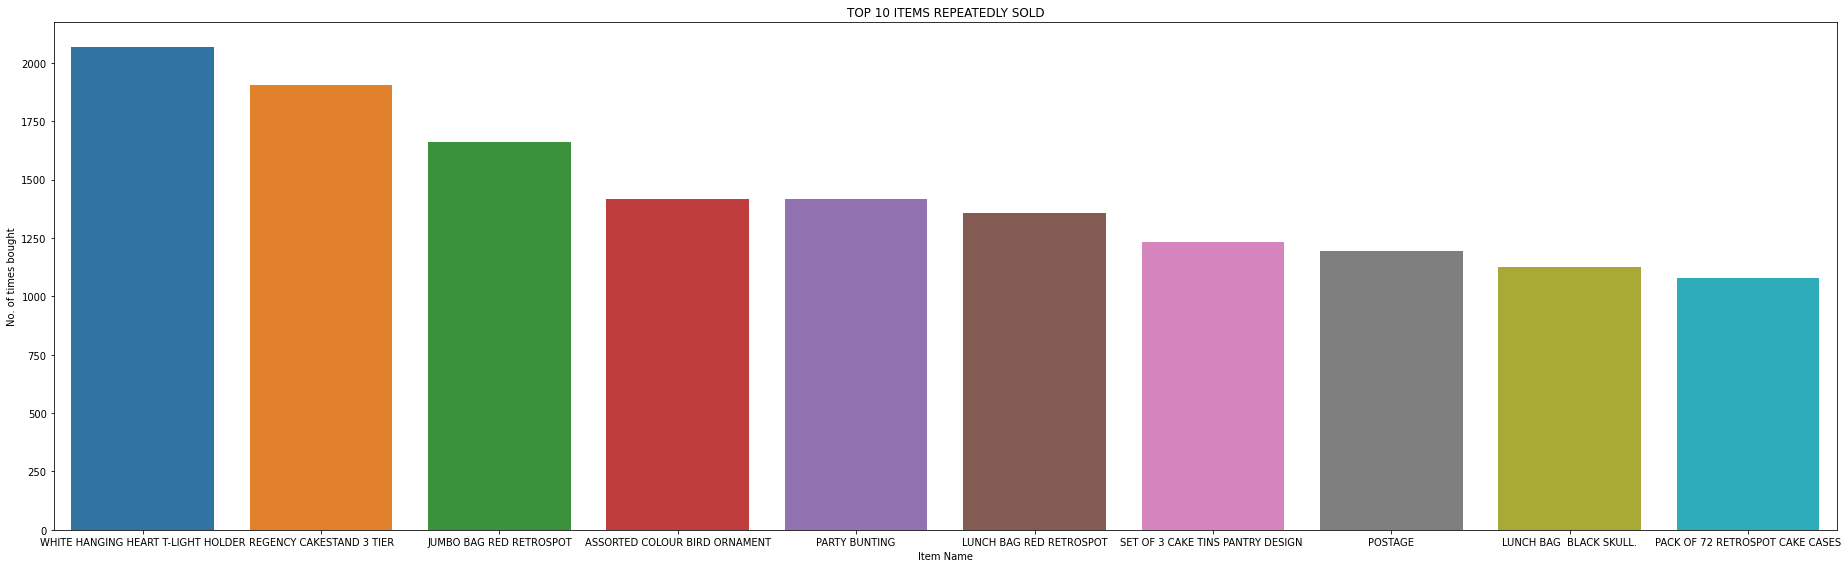

In [75]:
# Barplot of the top 10 most repeatedly sold items
plt.figure(figsize = (26,8))
sns.barplot(x = data['Description'].value_counts()[:10].index, y = data['Description'].value_counts()[:10].values)
plt.xlabel('Item Name')
plt.ylabel('No. of times bought')
plt.title('TOP 10 ITEMS REPEATEDLY SOLD')
plt.tight_layout()

In [ ]:
df_online.Country.value_counts().head(10).plot.bar(figsize=(8,5))

In [ ]:
len(df_online.CustomerID.unique())